<a href="https://colab.research.google.com/github/smoreira/TensorFlow2/blob/master/RLSimples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
print("You are using TensorFlow version", tf.__version__)
if len(tf.config.list_physical_devices('GPU')) > 0:
  print("You have a GPU enabled.")
else:
  print("Enable a GPU before running this notebook.")
  
import numpy as np
import matplotlib.pyplot as plt


You are using TensorFlow version 2.2.0-rc3
Enable a GPU before running this notebook.


Criando valores de X aleatórios

In [0]:
x = np.linspace(0,3,120)
y = 2 * x + 0.9 + np.random.randn(*x.shape) * 0.3

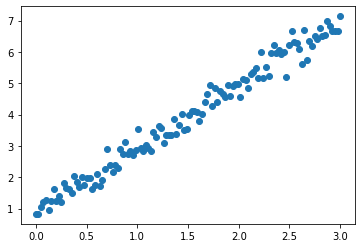

In [3]:
plt.scatter(x,y, label = "input data set")

In [0]:
class LinearModel:
  def __call__(self,x):
    return self.Weight * x + self.Bias
  
  def __init__(self):
    self.Weight = tf.Variable(11.0)
    self.Bias = tf.Variable(12.0)

In [0]:
def loss(y, pred):
  return tf.reduce_mean(tf.square(y - pred))

In [0]:
def train(linear_model, x, y, lr=0.12):
  with tf.GradientTape() as t:
    current_loss = loss(y, linear_model(x))

  lr_weight, lr_bias = t.gradient(current_loss, [linear_model.Weight, linear_model.Bias])
  linear_model.Weight.assign_sub(lr * lr_weight)
  linear_model.Bias.assign_sub(lr * lr_bias)

In [7]:
linear_model = LinearModel()
Weight, Bias = [], []

epochs = 80

for epoch_cont in range(epochs):
  Weight.append(linear_model.Weight.numpy())
  Bias.append(linear_model.Bias.numpy())
  real_loss = loss(y, linear_model(x))
  train(linear_model, x, y, lr=0.12)
  print(f"Epoch count {epoch_cont}: Loss Value: { real_loss.numpy()}")

Epoch count 0: Loss Value: 664.4693603515625
Epoch count 1: Loss Value: 10.44813060760498
Epoch count 2: Loss Value: 5.2020697593688965
Epoch count 3: Loss Value: 4.690247535705566
Epoch count 4: Loss Value: 4.257025241851807
Epoch count 5: Loss Value: 3.8646199703216553
Epoch count 6: Loss Value: 3.5089879035949707
Epoch count 7: Loss Value: 3.186680316925049
Epoch count 8: Loss Value: 2.894575595855713
Epoch count 9: Loss Value: 2.6298420429229736
Epoch count 10: Loss Value: 2.38991641998291
Epoch count 11: Loss Value: 2.172473192214966
Epoch count 12: Loss Value: 1.9754060506820679
Epoch count 13: Loss Value: 1.7968051433563232
Epoch count 14: Loss Value: 1.6349406242370605
Epoch count 15: Loss Value: 1.488243818283081
Epoch count 16: Loss Value: 1.3552932739257812
Epoch count 17: Loss Value: 1.234801173210144
Epoch count 18: Loss Value: 1.1256002187728882
Epoch count 19: Loss Value: 1.0266318321228027
Epoch count 20: Loss Value: 0.9369373917579651
Epoch count 21: Loss Value: 0.8556

In [8]:
linear_model.Weight.numpy(), linear_model.Bias.numpy()

(1.9767715, 0.9977383)

In [0]:
RMSE = loss(y,linear_model(x))

In [10]:
RMSE.numpy()

0.07181785